In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from ggplot import *
import matplotlib.pylab as plt 
%matplotlib inline

C:\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


## Towns State Table 

Contains Information about the location of the Agencies 

In [2]:
import re 
towns = pd.read_csv("town_state.csv")
L = lambda x: map(int, re.findall('\d+', x))[0]
towns['ZipCode'] = towns.Town.apply(L)   

print " Town_State shape", towns.shape
print "# Agencies :", len(towns.Agencia_ID.unique())
print "# Towns: ",len(towns.Town.unique())
print "# States:" ,len(towns.State.unique())
print "# ZipCodes:" ,len(towns.ZipCode.unique())
towns.head(10)

 Town_State shape (790, 4)
# Agencies : 790
# Towns:  260
# States: 33
# ZipCodes: 257


,Agencia_ID,Town,State,ZipCode
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F.",2008
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F.",2002
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO,2004
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F.",2008
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F.",2029
5,1116,2011 AG. SAN ANTONIO,"MÉXICO, D.F.",2011
6,1117,2001 AG. ATIZAPAN,ESTADO DE MÉXICO,2001
7,1118,2007 AG. LA VILLA,"MÉXICO, D.F.",2007
8,1119,2013 AG. MEGA NAUCALPAN,ESTADO DE MÉXICO,2013
9,1120,2018 AG. TEPALCATES 2,"MÉXICO, D.F.",2018



The Towns seems to be in the format *ZipCode//TownName

are Zipcodes close to each other? 

Why are there 257 ZipCodes but 260 Towns?  ZipCodes with 2 Towns 2059 2169 2152  different Towns

Can we Cluster ZipCodes with Same behavior? target column

In [3]:
test = towns[['Town', 'ZipCode']]
test = test.drop_duplicates('Town')
test[test.ZipCode == 2152]

,Town,ZipCode
199,2152 Cruce De Anden Noroeste,2152
371,2152 ALTAMIRANO_BM,2152


In [4]:
pertown = towns.groupby('ZipCode').Agencia_ID.agg([ 'count'])
pertown = pertown.sort('count', ascending = False)
pertown.head()


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,count
ZipCode,
2013,8
2355,7
2011,7
2396,6
2036,6


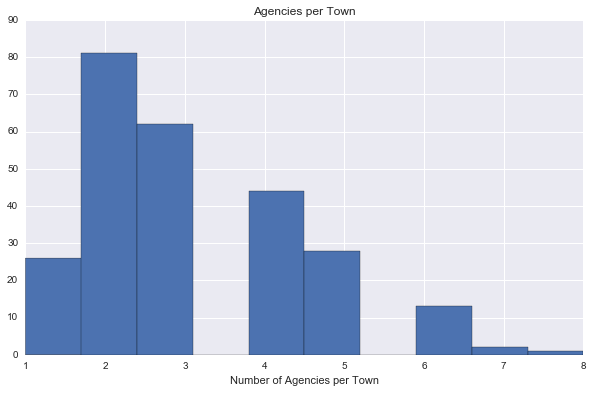

In [5]:
plt.figure(figsize=(10, 6))

plt.hist(pertown['count'])
plt.xlabel('Number of Agencies per Town')
plt.title('Agencies per Town')


Most Towns have 3 of less Agencies. There is a decent amount of Towns that have 4-5. And Few towns that have 6 or more Agencies.

Are the Towns unique ?



In [6]:
pertown.sort('count', ascending = False).head(10)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,count
ZipCode,
2013,8
2011,7
2355,7
2468,6
2555,6
2573,6
2322,6
2505,6
2161,6


## Clients Table 

Contains information about the Clients business name and ID 

In [7]:
clients = pd.read_csv("cliente_tabla.csv")
clients = clients.drop_duplicates('Cliente_ID')

print " Clients table shape ",clients.shape
print "#ID : ", len(clients.Cliente_ID.unique())
print "#NombreCliente :", len(clients.NombreCliente.unique())



 Clients table shape  (930500, 2)
#ID :  930500
#NombreCliente : 307009


In [8]:
clients.head(10)

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT
6,5,LA VAQUITA
7,6,LUPITA
8,7,I M EL GUERO
9,8,MINI SUPER LOS LUPES
10,9,SUPER KOMPRAS MICRO COLON


There appears to be a lots (356/9305000 = 0.03%) of SIN NOMBRE and misspelled client names, I want to try to reduce by name and Cluster all SIN NOMBRES of at least look at where they are located (by Town). 

There also appears to be a few names with double spaces. 

In [9]:
strip_blank = lambda x: x.replace(" ", "")
clients.NombreCliente =  clients.NombreCliente.apply(strip_blank)

NewClients = clients.drop_duplicates('NombreCliente').copy() ## I'm assuming SINNOMBRE are the same, I should not
NewClients['NewClientID'] = range(0,len(NewClients)) 
clients = clients.merge(NewClients ,on=['NombreCliente', 'Cliente_ID'], copy=False)

print " Clients table after Clean shape ",clients.shape
print "#ID : ", len(clients.Cliente_ID.unique())
print "#NombreCliente :", len(clients.NombreCliente.unique())

 Clients table after Clean shape  (305003, 3)
#ID :  305003
#NombreCliente : 305003


In [10]:
clients.head(10)

,Cliente_ID,NombreCliente,NewClientID
0,0,SINNOMBRE,0
1,1,OXXOXINANTECATL,1
2,3,ELMORENO,2
3,4,SDNSERDEALIMCUERPOSACIADEINT,3
4,5,LAVAQUITA,4
5,6,LUPITA,5
6,7,IMELGUERO,6
7,8,MINISUPERLOSLUPES,7
8,9,SUPERKOMPRASMICROCOLON,8
9,10,LONJAMERCANTILDETODO,9


## Products Table

Contains Information about the Products: name and ID  

In [11]:
products = pd.read_csv("producto_tabla.csv")

print " Products table shape ",products.shape
print "#ID : ", len(products.Producto_ID.unique())
print "#NombreProducto :", len(products.NombreProducto.unique())

products.head(10)

 Products table shape  (2592, 2)
#ID :  2592
#NombreProducto : 2592


,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72
5,73,Pan Multigrano Linaza 540g BIM 73
6,98,Tostado Integral 180g WON 98
7,99,Pan Blanco 567g WON 99
8,100,Super Pan Bco Ajonjoli 680g SP WON 100
9,106,Wonder 100pct mediano 475g WON 106


The products table seem some kind of clean (same #ID and Products) there is a NO IDENTIFICADO that worries me. Also we have some sort of standard *Product//weight//brand//number 

The last number seems like their internal Product_ID 

Are all these brands owned by Bimbo? 

How many NO IDENTIFICADO are there? Only 1 

In [12]:
get_brand = lambda x: str.split(x, ' ')[-2]
get_number = lambda x: str.split(x, ' ')[-1]
products['Brand'] = products.NombreProducto.apply(get_brand)
products['number'] = products.NombreProducto.apply(get_number)


print " Products table shape ",products.shape
print "#ID : ", len(products.Producto_ID.unique())
print "#NombreProducto :", len(products.NombreProducto.unique())
print "# Brands :", len(products.Brand.unique())
print "# numbers :", len(products.number.unique())
products.head(10)

 Products table shape  (2592, 4)
#ID :  2592
#NombreProducto : 2592
# Brands : 45
# numbers : 2592


,Producto_ID,NombreProducto,Brand,number
0,0,NO IDENTIFICADO 0,IDENTIFICADO,0
1,9,Capuccino Moka 750g NES 9,NES,9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41,BIM,41
3,53,Burritos Sincro 170g CU LON 53,LON,53
4,72,Div Tira Mini Doradita 4p 45g TR 72,TR,72
5,73,Pan Multigrano Linaza 540g BIM 73,BIM,73
6,98,Tostado Integral 180g WON 98,WON,98
7,99,Pan Blanco 567g WON 99,WON,99
8,100,Super Pan Bco Ajonjoli 680g SP WON 100,WON,100
9,106,Wonder 100pct mediano 475g WON 106,WON,106


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


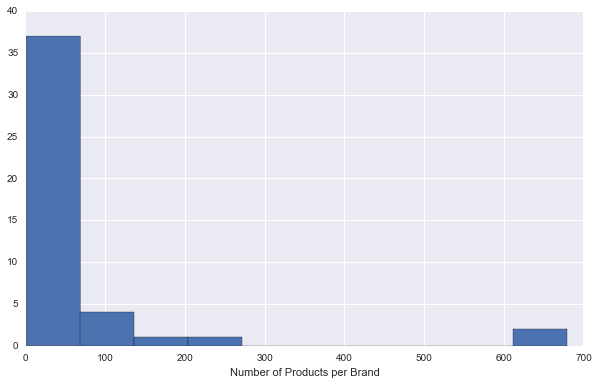

In [13]:
perbrand = products.groupby('Brand').Producto_ID.agg([ 'count'])

perbrand = perbrand.sort('count', ascending = False)

plt.figure(figsize=(10, 6))

plt.hist(perbrand['count'])
plt.xlabel('Number of Products per Brand')


In [14]:
perbrand.head(10)

,count
Brand,
BIM,679
MLA,657
TR,257
LAR,182
GBI,130
WON,117
DH,95
LON,83
SAN,66


## Train Table

In [15]:
df_train = pd.read_csv('train.csv',
                           dtype  = {'Semana': 'int32',
                                     'Producto_ID':'int32',
                                     'Venta_hoy':'float32',
                                     'Venta_uni_hoy': 'int32',
                                     'Dev_uni_proxima':'int32',
                                     'Dev_proxima':'float32',
                                     'Demanda_uni_equil':'int32'})

In [16]:
df_train.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.139999,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.520000,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.320000,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.520000,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.920000,0,0.0,3


Valuable input from 
https://www.kaggle.com/c/grupo-bimbo-inventory-demand/forums/t/21827/duplicates-in-train-data-except-for-routes

The Clients might be dispached by multiple routes

In [17]:
df_train[(df_train.Producto_ID == 31187) & (df_train.Cliente_ID == 1064922) & (df_train.Semana == 3)]


,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
4040992,3,1379,2,8640,1064922,31187,40,658.799988,0,0.0,40
10006067,3,2655,2,7740,1064922,31187,40,658.799988,0,0.0,40
10006068,3,2655,2,7742,1064922,31187,80,1317.599976,0,0.0,80
10006070,3,2655,2,7749,1064922,31187,100,1647.000000,0,0.0,100
10006071,3,2655,2,7753,1064922,31187,160,2635.199951,0,0.0,160
10006072,3,2655,2,7754,1064922,31187,20,329.399994,0,0.0,20
10006074,3,2655,2,7756,1064922,31187,100,1647.000000,0,0.0,100
10006075,3,2655,2,7758,1064922,31187,20,329.399994,0,0.0,20
10006076,3,2655,2,7759,1064922,31187,20,329.399994,0,0.0,20
10006077,3,2655,2,7761,1064922,31187,60,988.200012,0,0.0,60


In [18]:
print products[products.Producto_ID == 31187]



     Producto_ID                      NombreProducto Brand number
568        31187  Tostada Clasica 240g CJM SAN 31187   SAN  31187


In [19]:
giant_df = df_train.merge(clients, on = 'Cliente_ID')
giant_df = giant_df.merge(products, on='Producto_ID')
giant_df = giant_df.merge(towns, on ='Agencia_ID')
print giant_df.shape, df_train.shape


(28561420, 19) (74180464, 11)


In [20]:
giant_df.head()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,NombreCliente,NewClientID,NombreProducto,Brand,number,Town,State,ZipCode
0,3,1110,7,3301,15766,1212,3,25.139999,0,0.0,3,PUESTODEPERIODICOSLAZARO,3755,Roles Canela 2p 120g BIM 1212,BIM,1212,2008 AG. LAGO FILT,"MÉXICO, D.F.",2008
1,4,1110,7,3301,15766,1212,4,33.520000,0,0.0,4,PUESTODEPERIODICOSLAZARO,3755,Roles Canela 2p 120g BIM 1212,BIM,1212,2008 AG. LAGO FILT,"MÉXICO, D.F.",2008
2,5,1110,7,3301,15766,1212,5,41.900002,0,0.0,5,PUESTODEPERIODICOSLAZARO,3755,Roles Canela 2p 120g BIM 1212,BIM,1212,2008 AG. LAGO FILT,"MÉXICO, D.F.",2008
3,8,1110,7,3301,15766,1212,4,33.520000,0,0.0,4,PUESTODEPERIODICOSLAZARO,3755,Roles Canela 2p 120g BIM 1212,BIM,1212,2008 AG. LAGO FILT,"MÉXICO, D.F.",2008
4,9,1110,7,3301,15766,1212,1,8.380000,0,0.0,1,PUESTODEPERIODICOSLAZARO,3755,Roles Canela 2p 120g BIM 1212,BIM,1212,2008 AG. LAGO FILT,"MÉXICO, D.F.",2008


In [21]:
print "#Routes :", len(giant_df.Ruta_SAK.unique())
print "#Weeks :", len(giant_df.Semana.unique())
print "#Canal_ID :", len(giant_df.Canal_ID.unique())
print "#Brands :", len(giant_df.Brand.unique())
print "#Products :", len(giant_df.Producto_ID.unique())
print "#Agencies :", len(giant_df.Agencia_ID.unique())
print "#Clients :", len(giant_df.NewClientID.unique())

#Routes : 3461
#Weeks : 7
#Canal_ID : 9
#Brands : 30
#Products : 1733
#Agencies : 552
#Clients : 296655


What Does Canal_ID means? are they correlated in some way? Are they  correlated to the Type of product? 

Do Routes share the same Canal_ID? or each Canal_ID have their own Routes? 

Also we have 45 Brands in the Product Table but only 30 in the Train table 

Also we have 305003 Clients in the Clients Table but only 296655 in the Train Table

Also we have 790 Agencies in the Town State Table but only 552 in the Train Table


In [22]:
test = giant_df[['Canal_ID','Ruta_SAK']].groupby('Canal_ID')
test = test.Ruta_SAK.agg(['count'])
print test.shape
test.head(10)

(9, 1)


,count
Canal_ID,
1,24083594
2,748970
4,2490889
5,145309
6,192153
7,360360
8,39381
9,338
11,500426


In [23]:
routes = giant_df[['Canal_ID','Ruta_SAK']]
routes1 = routes[routes.Canal_ID == 1].Ruta_SAK.unique()
routes2 = routes[routes.Canal_ID == 2].Ruta_SAK.unique()

print routes2.shape, routes1.shape
print np.intersect1d(routes1,routes1).shape 

(1966L,) (1199L,)
(1199L,)


The Routes are not exclusive for the Canal_ID

Do All the brands share the same routes? Agencies ? 

In [24]:
brand_df = giant_df[['Semana','Agencia_ID', 'Ruta_SAK', 'Brand']].sort('Semana').drop_duplicates()
brand_df = brand_df.groupby(['Semana','Brand'])
brand_df.head(10)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Semana,Agencia_ID,Ruta_SAK,Brand
0,3,1110,3301,BIM
11961893,3,1351,2055,MLA
11961852,3,1351,2054,MLA
11961894,3,1351,2052,MLA
11961794,3,1351,2053,MLA
11961787,3,1351,2036,MLA
11961744,3,1351,2035,MLA
11961901,3,1351,2044,MLA
11962036,3,1351,2833,MLA
11962015,3,1351,2834,MLA


In [25]:
Routeperbrand = brand_df.Ruta_SAK.agg([ 'count'])
Routeperbrand.head(10)


count
Semana Brand       
3      BAR      517
       BIM    15307
       BRE        4
       CC       416
       COR       16
       DH      8593
       GBI     1481
       JMX      413
       KOD      262
       LAR     5139

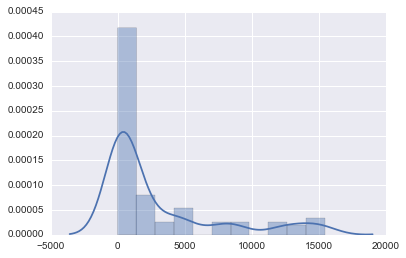

In [26]:
sns.distplot(Routeperbrand)

In [27]:
# Group by Clients and Plot Demanda_uni_equil

demand_df = giant_df[['Semana','Agencia_ID', 'Cliente_ID','Producto_ID','Ruta_SAK','Canal_ID' ,'Venta_uni_hoy', 'Dev_uni_proxima', 'Demanda_uni_equil']]
demand_df = demand_df.sort('Semana')

#demand_df = demand_df.groupby(['Semana','NewClientID','Producto_ID'])

demand_df.head(10)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Semana,Agencia_ID,Cliente_ID,Producto_ID,Ruta_SAK,Canal_ID,Venta_uni_hoy,Dev_uni_proxima,Demanda_uni_equil
0,3,1110,15766,1212,3301,7,3,0,3
11961893,3,1351,2417585,43069,2055,1,6,0,6
11961886,3,1351,2238921,43069,2055,1,10,0,10
11961881,3,1351,2214249,43069,2055,1,5,0,5
11961866,3,1351,1171406,43069,2055,1,10,0,10
11961859,3,1351,873428,43069,2055,1,3,0,3
11961856,3,1351,571684,43069,2055,1,3,0,3
11961852,3,1351,495348,43069,2054,1,5,0,5
11961839,3,1351,119739,43069,2055,1,7,0,7
11961832,3,1351,119522,43069,2055,1,11,0,11


In [28]:
demand_df.columns

Index([u'Semana', u'Agencia_ID', u'Cliente_ID', u'Producto_ID', u'Ruta_SAK',
       u'Canal_ID', u'Venta_uni_hoy', u'Dev_uni_proxima',
       u'Demanda_uni_equil'],
      dtype='object')

In [31]:
g1 = demand_df.groupby(['Semana','Cliente_ID'] )['Demanda_uni_equil'].mean()
g1 = g1.reset_index().groupby(['Semana'])['Demanda_uni_equil'].mean()

g2 = demand_df.groupby(['Semana','Producto_ID'])['Demanda_uni_equil'].mean()
g2 = g2.reset_index().groupby(['Semana'])['Demanda_uni_equil'].mean()

g3 = demand_df.groupby(['Semana','Cliente_ID','Producto_ID'])['Demanda_uni_equil'].mean()
g3 = g3.reset_index().groupby(['Semana'])['Demanda_uni_equil'].mean()

g4 = demand_df.groupby(['Semana','Agencia_ID','Producto_ID'])['Demanda_uni_equil'].mean()
g4 = g4.reset_index().groupby(['Semana'])['Demanda_uni_equil'].mean()

g5 = demand_df.groupby(['Semana','Ruta_SAK','Producto_ID'])['Demanda_uni_equil'].mean()
g5 = g5.reset_index().groupby(['Semana'])['Demanda_uni_equil'].mean()

g6 = demand_df.groupby(['Semana','Canal_ID','Producto_ID'])['Demanda_uni_equil'].mean()
g6 = g6.reset_index().groupby(['Semana'])['Demanda_uni_equil'].mean()


Semana
3    49.355240
4    44.176923
5    44.245091
6    46.404885
7    42.003867
8    44.648191
9    55.686671
Name: Demanda_uni_equil, dtype: float64

Semana
3    8.484495
4    8.835400
5    8.918653
6    8.911371
7    9.000478
8    8.846638
9    8.811425
Name: Demanda_uni_equil, dtype: float64

Semana
3    25.579295
4    26.816697
5    26.391073
6    25.438038
7    25.390078
8    25.408730
9    26.252630
Name: Demanda_uni_equil, dtype: float64

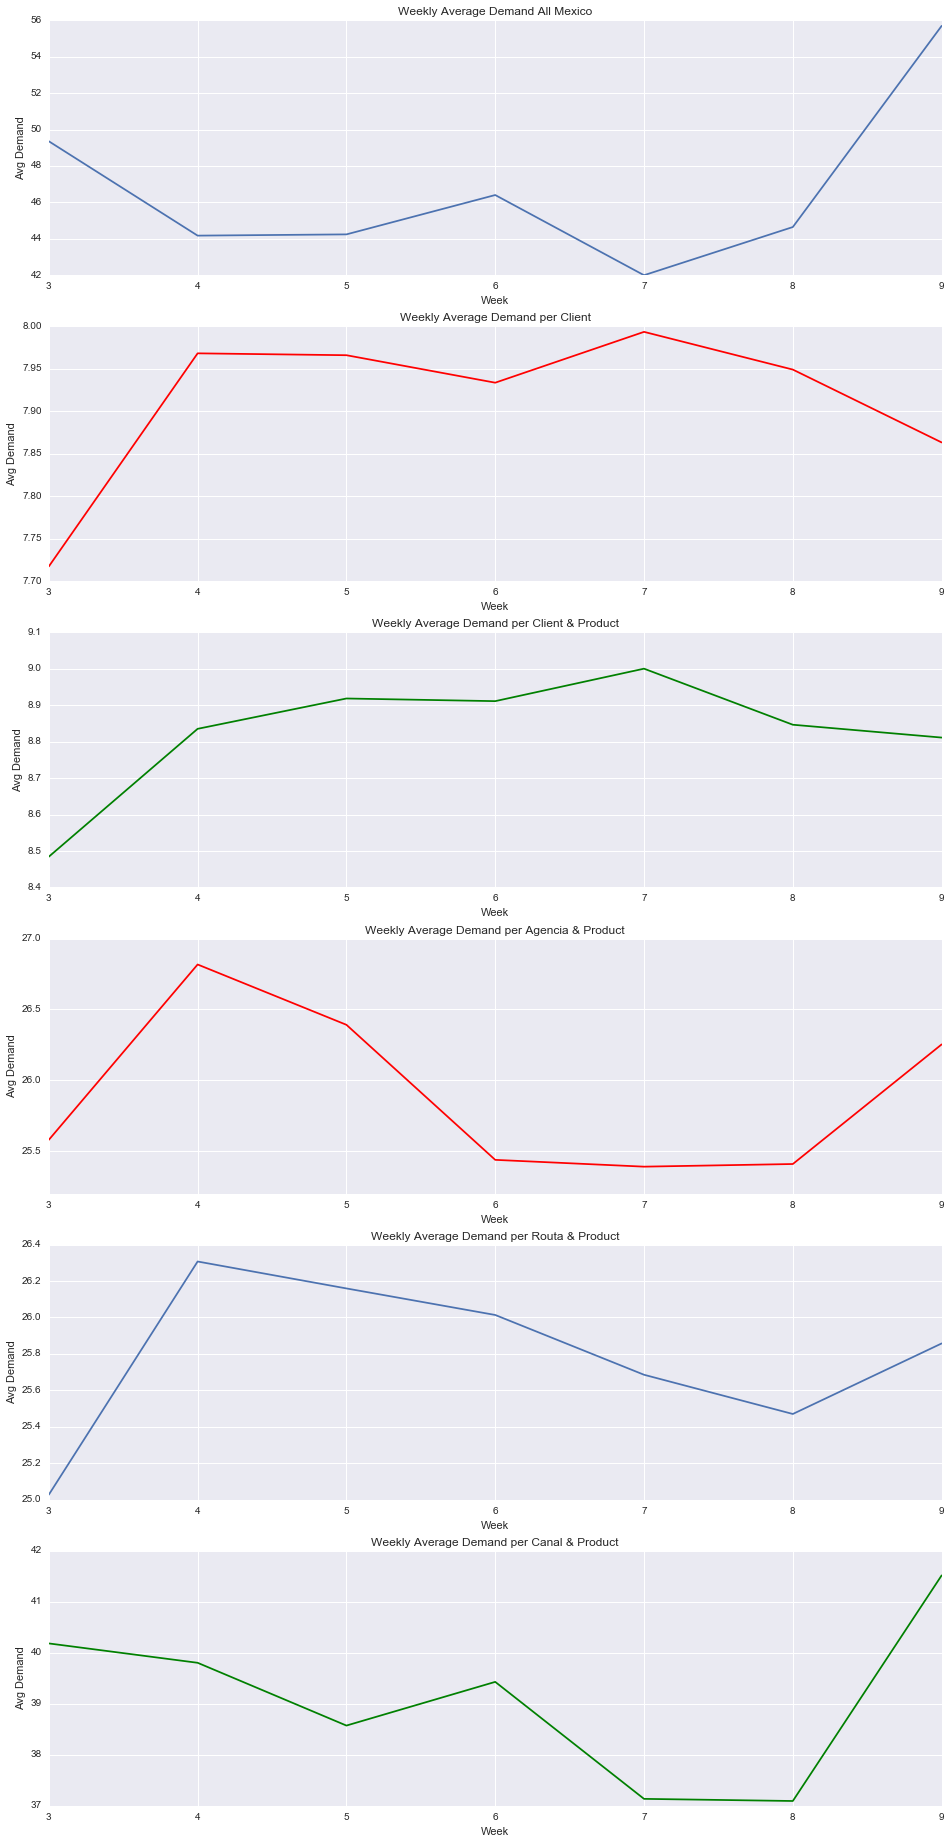

In [32]:
from IPython.display import display

display(g2.head(10))
display(g3.head(10))
display(g4.head(10))

g = plt.figure(figsize= (16,32))


g.add_subplot(6,1,1)
plt.plot(g2)
plt.title("Weekly Average Demand All Mexico")
plt.xlabel('Week')
plt.ylabel('Avg Demand')

g.add_subplot(6,1,2)
plt.plot(g1,"r")
plt.title("Weekly Average Demand per Client")
plt.xlabel('Week')
plt.ylabel('Avg Demand')

g.add_subplot(6,1,3)
plt.plot(g3,"g")
plt.title("Weekly Average Demand per Client & Product")
plt.xlabel('Week')
plt.ylabel('Avg Demand')

g.add_subplot(6,1,4)
plt.plot(g4,"r")
plt.title("Weekly Average Demand per Agencia & Product")
plt.xlabel('Week')
plt.ylabel('Avg Demand')

g.add_subplot(6,1,5)
plt.plot(g5)
plt.title("Weekly Average Demand per Routa & Product")
plt.xlabel('Week')
plt.ylabel('Avg Demand')

g.add_subplot(6,1,6)
plt.plot(g6,"g")
plt.title("Weekly Average Demand per Canal & Product")
plt.xlabel('Week')
plt.ylabel('Avg Demand')


In [34]:
canal_per_clients = giant_df.groupby(['Cliente_ID'])['Canal_ID'].apply(lambda x: len(x.unique()))


Cliente_ID
1744315    1
1744273    1
1744249    1
1744243    1
1744241    1
1744228    1
1744211    1
1744180    1
1744170    1
26         1
Name: Canal_ID, dtype: int64
Cliente_ID
23916      4
103615     3
879265     3
1212197    3
529455     3
1031057    3
907059     3
53444      3
1967754    3
16037      3
Name: Canal_ID, dtype: int64


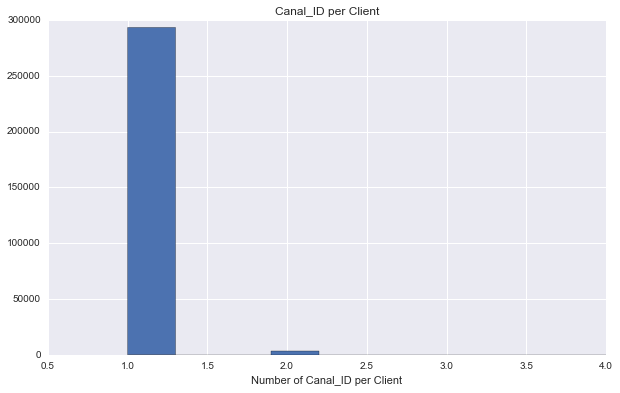

In [35]:
plt.figure(figsize=(10, 6))

plt.hist(canal_per_clients)
plt.xlabel('Number of Canal_ID per Client')
plt.title('Canal_ID per Client')

canal_per_clients = canal_per_clients.sort_values(ascending=False)
print canal_per_clients.tail(10)
print canal_per_clients.head(10)

In [36]:


routes_per_client = giant_df.groupby(['Ruta_SAK'])['Cliente_ID'].apply(lambda x: len(x.unique()))
clients_per_route = giant_df.groupby(['Cliente_ID'])['Ruta_SAK'].apply(lambda x: len(x.unique()))



Cliente_ID
1035986    1
1035964    1
360235     1
2468047    1
1035891    1
1035886    1
360272     1
1035854    1
1686335    1
2317619    1
Name: Ruta_SAK, dtype: int64
Cliente_ID
1093627    57
1885888    57
653378     47
1064922    46
5903732    27
1404831    25
60         21
2391632    20
1410728    20
886620     18
Name: Ruta_SAK, dtype: int64


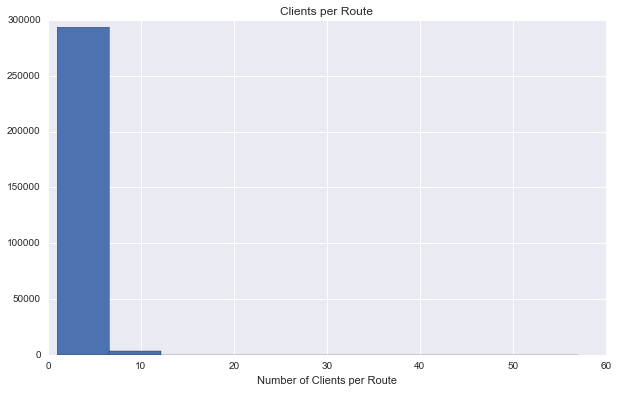

In [37]:
plt.figure(figsize=(10, 6))

plt.hist(clients_per_route)
plt.xlabel('Number of Clients per Route')
plt.title('Clients per Route')

clients_per_route = clients_per_route.sort_values(ascending=False)
print clients_per_route.tail(10)
print clients_per_route.head(10)

Ruta_SAK
7764    1
7771    1
7770    1
7769    1
2500    1
7768    1
7767    1
7766    1
7765    1
9991    1
Name: Cliente_ID, dtype: int64
Ruta_SAK
2101    4662
2102    4536
2103    4200
2802    4118
2801    3959
2104    3761
2803    3592
5001    3523
2105    3495
2113    3333
Name: Cliente_ID, dtype: int64


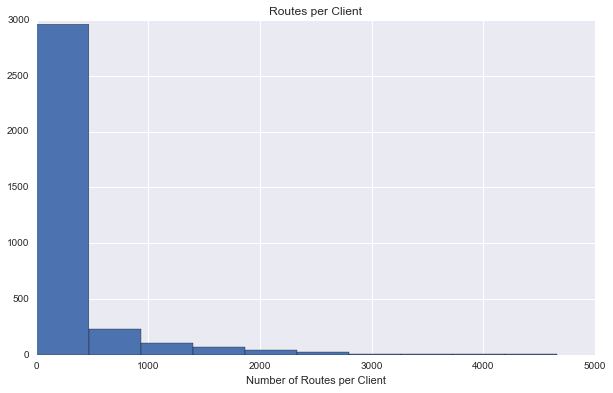

In [38]:
plt.figure(figsize=(10, 6))

plt.hist(routes_per_client)
plt.xlabel('Number of Routes per Client')
plt.title('Routes per Client')

routes_per_client = routes_per_client.sort_values(ascending=False)
print routes_per_client.tail(10)
print routes_per_client.head(10)

Data fields

    Semana — Week number (From Thursday to Wednesday)
    Agencia_ID — Sales Depot ID
    Canal_ID — Sales Channel ID
    Ruta_SAK — Route ID (Several routes = Sales Depot)
    Cliente_ID — Client ID
    NombreCliente — Client name
    Producto_ID — Product ID
    NombreProducto — Product Name
    Venta_uni_hoy — Sales unit this week (integer)          <----- FUTURE
    Venta_hoy — Sales this week (unit: pesos)               <----- FUTURE
    Dev_uni_proxima — Returns unit next week (integer)      <----- FUTURE
    Dev_proxima — Returns next week (unit: pesos)           <----- FUTURE
    Demanda_uni_equil — Adjusted Demand (integer) (This is the target you will predict)

Things to note:

    There may be products in the test set that don't exist in the train set. This is the expected behavior of inventory data, since there are new products being sold all the time. Your model should be able to accommodate this.
    There are duplicate Cliente_ID's in cliente_tabla, which means one Cliente_ID may have multiple NombreCliente that are very similar. This is due to the NombreCliente being noisy and not standardized in the raw data, so it is up to you to decide how to clean up and use this information. 
    The adjusted demand (Demanda_uni_equil) is always >= 0 since demand should be either 0 or a positive value. The reason that Venta_uni_hoy - Dev_uni_proxima sometimes has negative values is that the returns records sometimes carry over a few weeks.



## Test Data

Lets look a the test data to find missing Clients, Routes, Agencies or Products 

In [40]:
df_test = pd.read_csv('test.csv')

print "#Semana: ", df_test.Semana.unique().shape
print "#Agencia: ", df_test.Agencia_ID.unique().shape
print "#Canal_ID: ", df_test.Canal_ID.unique().shape
print "#Ruta_SAK: ", df_test.Ruta_SAK.unique().shape
print "#Cliente_ID", df_test.Cliente_ID.unique().shape
print "#Productos: ", df_test.Producto_ID.unique().shape
df_test.head()

#Semana:  (2L,)
#Agencia:  (552L,)
#Canal_ID:  (9L,)
#Ruta_SAK:  (2608L,)
#Cliente_ID (745164L,)
#Productos:  (1522L,)


,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,0,11,4037,1,2209,4639078,35305
1,1,11,2237,1,1226,4705135,1238
2,2,10,2045,1,2831,4549769,32940
3,3,11,1227,1,4448,4717855,43066
4,4,11,1219,1,1130,966351,1277


In [41]:
test_semanas = df_test.Semana.unique()
train_semanas = df_train.Semana.unique()

test_agencies = df_test.Agencia_ID.unique()
train_agencies = df_train.Agencia_ID.unique()

test_canal = df_test.Canal_ID.unique()
train_canal = df_train.Canal_ID.unique()

test_routes = df_test.Ruta_SAK.unique()
train_routes = df_train.Ruta_SAK.unique()

test_clients = df_test.Cliente_ID.unique()
train_clients = df_train.Cliente_ID.unique()

test_products = df_test.Producto_ID.unique()
train_products = df_train.Producto_ID.unique()

print "#Overlaping Semanas ", np.intersect1d(test_semanas, train_semanas).shape
print "#Overlaping Agencies ", np.intersect1d(test_agencies, train_agencies).shape
print "#Overlaping Canal ", np.intersect1d(test_canal, train_canal).shape
print "#Overlaping Routes ", np.intersect1d(test_routes, train_routes).shape
print "#Overlaping Clients ", np.intersect1d(test_clients, train_clients).shape
print "#Overlaping Products ", np.intersect1d(test_products, train_products).shape

#Overlaping Semanas  (0L,)
#Overlaping Agencies  (552L,)
#Overlaping Canal  (9L,)
#Overlaping Routes  (2591L,)
#Overlaping Clients  (735501L,)
#Overlaping Products  (1488L,)


All channels in both test and train, both agencias in train and test 


In [42]:

print "Routes in Train: ", train_routes.shape, " in Test: ", test_routes.shape, " Test no in Train", np.setdiff1d(test_routes, train_routes).shape
print "Clients in Train: ", train_clients.shape, " in Test: ", test_clients.shape, " Test no in Train", np.setdiff1d(test_clients, train_clients).shape
print "Products in Train: ", train_products.shape, " in Test: ", test_products.shape, " Test no in Train", np.setdiff1d(test_products, train_products).shape


Routes in Train:  (3603L,)  in Test:  (2608L,)  Test no in Train (17L,)
Clients in Train:  (880604L,)  in Test:  (745164L,)  Test no in Train (9663L,)
Products in Train:  (1799L,)  in Test:  (1522L,)  Test no in Train (34L,)
